# Introduccion

Dado un set de datos de accidentes automovilisticos se quieren utilizar tecnicas de Machine Learning para entrenar un modelo y poder predecir o clasificar la severidad de un accidente.


# Tipo de problema

Se desea entrenar el modelo para determinar la severidad de un accidente. La severidad se clasifica entre los valores 1 a 4, siendo 1 el menos severo y 4 el más severo. Dado que debemos clasificar el set de datos con valores discretos lo mas conveniente seria utilizar modelos de clasificacion. 

# Variables y caracteristicas

Interpretar las variables del dataset y como pueden servirnos o no para la estimacion. Por que elegimos las columnas, que nuevas columnas podemos crear a partir de las que tenemos

# Preprocesamiento del set de datos

En este paso se determina el estado del dataset, que datos nos sirven y que se puede mejorar para que el entrenamiento sea satisfactorio.

Ver tp1_dataset_processing.ipynb

In [1]:
#%store -r dataset
import pandas as pd
import numpy as np
dataset = pd.read_feather("dataframe")
print(dataset.shape)
dataset = dataset[0:10000] #Para que no me explote la pc no cargo todo el dataset

dataset.info()

(933236, 176)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 176 entries, index to Sunrise_Sunset_Night
dtypes: bool(13), float64(9), int64(4), timedelta64[ns](1), uint8(149)
memory usage: 2.6 MB


In [2]:
#Convierto el tiempo a horas para que quede mas comodo
dataset["Time_Elapsed"] = dataset["Time_Elapsed"].astype(np.timedelta64) / np.timedelta64(1, 'h')

# Modelos de prediccion a aplicar

Aca entraria una breve explicacion de que modelos vamos a usar y el por que

* Formalizar tecnica de seleccion de datos
* Evaluar modelos usados segun resultado obtenido
* Comentar ventajas y desventajas de los modelos elegidos

In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics


In [4]:
X = dataset #Features a entrenar
y = dataset.pop("Severity") #Datos de target

#Funcion auxiliar para escalar los datos
def scale_data(X,y):
    #Separamos el dataset en partes de entrenamiento y de testeo
    X_train, X_test, Y_train, Y_test = train_test_split(X,y)


    scaler = MinMaxScaler()
    #Entrenamos el scaler con los datos del set de entrenamiento
    scaler.fit(X_train)

    #Aplicamos la transformacion a ambos sets de entrenamiento y de testeo
    norm_x_train = scaler.transform(X_train)
    norm_x_test = scaler.transform(X_test)
    
    return norm_x_train, norm_x_test, Y_train, Y_test



Para escalar los datos usamos MinMaxScaler, entrenado con la particion de entrenamiento. Esto es porque en la vida real la particion de test no la conocemos hasta tratar de predecir con un modelo ya entrenado. Por eso hacemos fit sobre X_train y transform en ambos X_train y X_test, logrando simular la realidad.

# Modelo 1: SGD

TODO: Breve explicacion de por que elegimos

In [5]:
#Escalamos los datos
norm_x_train , norm_x_test, y_train, y_test = scale_data(X,y)
i_range = range(1,10)
scores = {}
list_scores = []
for i in i_range:
    est = SGDClassifier(average=i)
    est.fit(norm_x_train, y_train)
    print("fit done")
    y_pred = est.predict(norm_x_test)
    scores[i] = metrics.accuracy_score(y_test, y_pred)
    list_scores.append(metrics.accuracy_score(y_test, y_pred))


fit done
fit done
fit done
fit done
fit done
fit done
fit done
fit done
fit done


Text(0, 0.5, 'Resultado de accuracy')

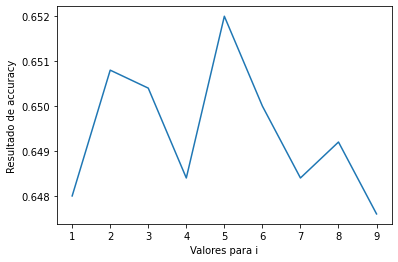

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(i_range, list_scores)
plt.xlabel("Valores para i")
plt.ylabel("Resultado de accuracy")

# Modelo 2: Clasificador KNN

In [7]:

print("Scaling Starting...")
norm_x_train, norm_x_test, y_train, y_test = scale_data(X,y)
print("Scaling done")

#Definimos un rango de Ks para probar
k_range = range(1,21)

#Nos guardamos los scores de entrenamiento para graficar luego.
scores = {}
scores_list = []

for k in k_range: #Automaticamente testeamos el modelo para k entre 1 y k_range, y nos guardamos el accuracy de cada uno
    print("Knn Starting...",k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(norm_x_train,y_train)
    print(f"Knn with k = {k} done")
    y_pred = knn.predict(norm_x_test)
    print("Pred done")
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    print(k, scores[k])

Scaling Starting...
Scaling done
Knn Starting... 1
Knn with k = 1 done
Pred done
1 0.6416
Knn Starting... 2
Knn with k = 2 done
Pred done
2 0.6368
Knn Starting... 3
Knn with k = 3 done
Pred done
3 0.6384
Knn Starting... 4
Knn with k = 4 done
Pred done
4 0.642
Knn Starting... 5
Knn with k = 5 done
Pred done
5 0.6432
Knn Starting... 6
Knn with k = 6 done
Pred done
6 0.6456
Knn Starting... 7
Knn with k = 7 done
Pred done
7 0.6392
Knn Starting... 8
Knn with k = 8 done
Pred done
8 0.6332
Knn Starting... 9
Knn with k = 9 done
Pred done
9 0.642
Knn Starting... 10
Knn with k = 10 done
Pred done
10 0.6464
Knn Starting... 11
Knn with k = 11 done
Pred done
11 0.6428
Knn Starting... 12
Knn with k = 12 done
Pred done
12 0.6448
Knn Starting... 13
Knn with k = 13 done
Pred done
13 0.6416
Knn Starting... 14
Knn with k = 14 done
Pred done
14 0.6424
Knn Starting... 15
Knn with k = 15 done
Pred done
15 0.6416
Knn Starting... 16
Knn with k = 16 done
Pred done
16 0.64
Knn Starting... 17
Knn with k = 17 don

Text(0, 0.5, 'Resultado de accuracy')

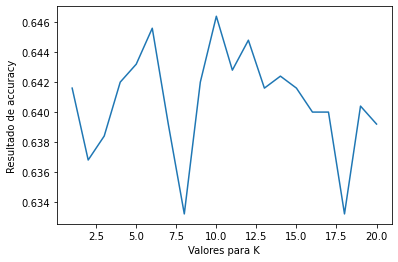

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, scores_list)
plt.xlabel("Valores para K")
plt.ylabel("Resultado de accuracy")

# Modelo 3: Clasificador MLP (Multi-layered Perceptron)

TODO: Armar una breve explicacion del por que lo elegimos

# Presentacion de los resultados obtenidos

Aca mostrar resultados de las predicciones, graficos o lo que sea